In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

# makes sure charts appear in the notebook rather than a popup window
%matplotlib inline

## Overview & General Visualisation - Transactions

In [12]:
transactions_df = pd.read_csv('la_liga_filtered_cards_transactions.csv', dtype={20: str})

In [13]:
transactions_df.shape

(1246067, 51)

In [14]:


# Calculate the summary statistics grouped by 'transaction_year'
summary_stats = transactions_df.groupby('transaction_date_year')['price_eur'].agg(['mean', 'median', 'max', 'min', 'sum'])

# Calculate the overall summary statistics
overall_stats = transactions_df['price_eur'].agg(['mean', 'median', 'max', 'min', 'sum'])

# Format the numbers and round to 2 decimal places
summary_table = summary_stats.apply(lambda x: x.round(2)).astype(str)
summary_table['sum'] = summary_table['sum'].apply(lambda x: f"{float(x):,.2f}")

# Format the overall statistics
overall_stats_table = pd.DataFrame(overall_stats).transpose()  # Convert the Series to DataFrame
overall_stats_table = overall_stats_table.round(2).astype(str)
overall_stats_table['sum'] = overall_stats_table['sum'].apply(lambda x: f"{float(x):,.2f}")

print("Per Year Summary Statistics:")
display(summary_table)

print("\nOverall Summary Statistics:")
display(overall_stats_table)

Per Year Summary Statistics:


,mean,median,max,min,sum
transaction_date_year,,,,,
2021,48.17,12.33,2545.64,0.0,"7,013,958.03"
2022,36.53,6.62,2548.37,0.0,"18,497,385.30"
2023,8.64,1.54,2758.6,0.0,"4,582,400.29"
2024,5.37,0.84,304.14,0.0,"342,600.83"



Overall Summary Statistics:


,mean,median,max,min,sum
price_eur,24.43,3.73,2758.6,0.0,"30,436,344.45"


In [15]:
list(set(transactions_df.dtypes.tolist()))

[dtype('bool'), dtype('float64'), dtype('int64'), dtype('O')]

In [16]:
# Create new column combining the 'transaction_date_year' and 'transaction_date_quarter'/month' columns
transactions_df.loc[:, 'Quarter_Year'] = transactions_df['transaction_date_year'].astype(str) + ', Q' + transactions_df['transaction_date_quarter'].astype(str)
transactions_df.loc[:, 'Month_Year'] = transactions_df['transaction_date_year'].astype(str) + ', M' + transactions_df['transaction_date_month'].astype(str)

In [17]:
transactions_df['transaction_category'].value_counts()

transaction_category
monetary_transaction    928208
trade                   193761
free_transaction        121018
other                     3080
Name: count, dtype: int64

In [18]:
# Filtering on Monetary to analyse the price evolution.
monetary_transactions_df = transactions_df[transactions_df['transaction_category'] == 'monetary_transaction']
monetary_transactions_df.shape

(928208, 53)

In [19]:
monetary_transactions_df.dtypes

present_team_name                object
card_id                          object
asset_id                         object
card_name                        object
season_year                       int64
card_slug                        object
rarity                           object
card_creation_date               object
grade                             int64
power                           float64
xp                                int64
serial_number                     int64
shirt_number                      int64
special_edition                    bool
transaction_date                 object
transaction_type                 object
price_wei                         int64
price_eur                       float64
user_id                          object
user_slug                        object
player_slug                      object
card_creation_date_year           int64
card_creation_date_quarter        int64
card_creation_date_month          int64
card_creation_date_week           int64


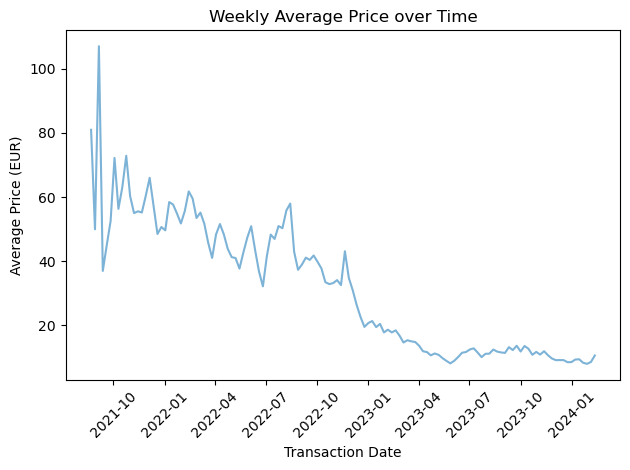

In [20]:
# Convert 'transaction_date' column to datetime data type
monetary_transactions_df.loc[:, 'transaction_date'] = pd.to_datetime(monetary_transactions_df['transaction_date'])

# Set 'transaction_date' as the index
monetary_transactions_df.set_index('transaction_date', inplace=True)

# Resample data to get the weekly average price
weekly_avg_price = monetary_transactions_df['price_eur'].resample('W').mean()

# Create a line plot of the weekly average price over time
plt.plot(weekly_avg_price.index, weekly_avg_price.values)
plt.xlabel('Transaction Date')
plt.ylabel('Average Price (EUR)')
plt.title('Weekly Average Price over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

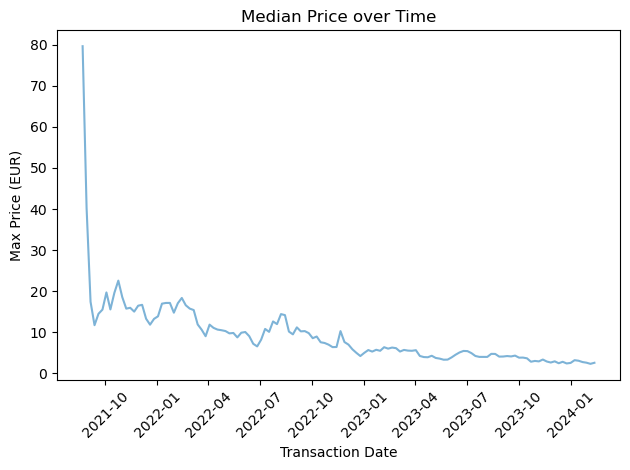

In [21]:
# Resample data to get the weekly average price
weekly_median_price = monetary_transactions_df['price_eur'].resample('W').median()

# Create a line plot of the weekly average price over time
plt.plot(weekly_median_price.index, weekly_median_price.values)
plt.xlabel('Transaction Date')
plt.ylabel('Max Price (EUR)')
plt.title('Median Price over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

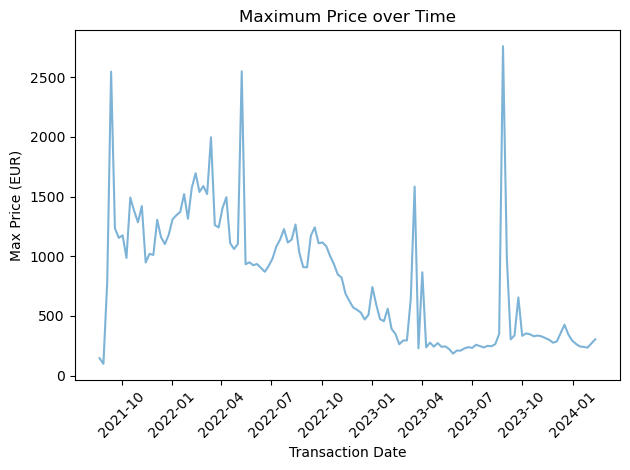

In [22]:

# Resample data to get the weekly average price
weekly_max_price = monetary_transactions_df['price_eur'].resample('W').max()

# Create a line plot of the weekly average price over time
plt.plot(weekly_max_price.index, weekly_max_price.values)
plt.xlabel('Transaction Date')
plt.ylabel('Max Price (EUR)')
plt.title('Maximum Price over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Show the 50 maximum values of 'price_eur' column
top_500_max_values = monetary_transactions_df['price_eur'].nlargest(500)
print(top_500_max_values)

transaction_date
2023-08-27 10:38:52+00:00    2758.597530
2022-05-03 20:53:54+00:00    2548.368784
2021-09-10 18:06:23+00:00    2545.641000
2021-09-10 18:11:23+00:00    2545.641000
2022-03-12 18:34:52+00:00    1995.554400
                                ...     
2021-10-30 13:48:31+00:00    1074.567200
2021-10-28 18:18:49+00:00    1074.287610
2022-08-14 10:18:20+00:00    1073.859444
2022-03-07 09:42:45+00:00    1073.203000
2022-04-08 08:47:51+00:00    1072.484154
Name: price_eur, Length: 500, dtype: float64


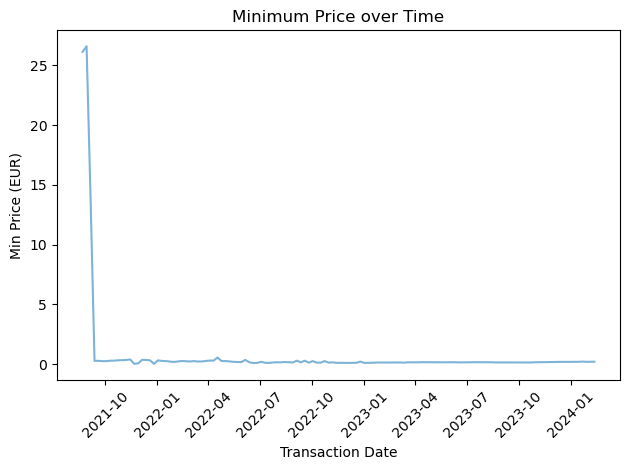

In [24]:

# Resample data to get the weekly average price
weekly_min_price = monetary_transactions_df['price_eur'].resample('W').min()

# Create a line plot of the weekly average price over time
plt.plot(weekly_min_price.index, weekly_min_price.values)
plt.xlabel('Transaction Date')
plt.ylabel('Min Price (EUR)')
plt.title('Minimum Price over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
eth_price = pd.read_csv('ETH-EUR.csv')

In [26]:
eth_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-01,2904.953369,3240.188477,2869.870117,3238.466309,3238.466309,25394505842
1,2021-09-02,3230.189941,3226.133057,3145.891602,3192.718750,3192.718750,20538724608
2,2021-09-03,3189.768066,3383.274902,3125.017090,3317.280518,3317.280518,22062168396
3,2021-09-04,3315.003662,3341.553467,3229.630615,3271.619385,3271.619385,17509122062
4,2021-09-05,3270.359131,3348.947021,3230.098633,3325.186768,3325.186768,15457110659


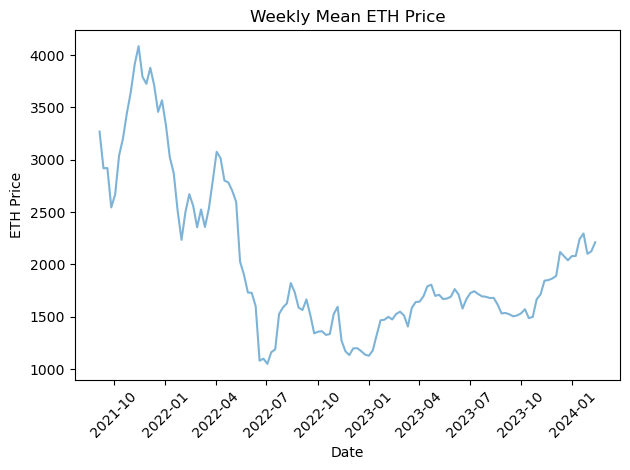

In [27]:

# Filter 'eth_price' DataFrame for the desired dates
start_date = '2021-09-01'
end_date = '2024-02-10'
eth_price_subset = eth_price[(eth_price['Date'] >= start_date) & (eth_price['Date'] <= end_date)].copy()

# Convert 'Date' column to datetime
eth_price_subset['Date'] = pd.to_datetime(eth_price_subset['Date'])

# Set 'Date' column as the index
eth_price_subset.set_index('Date', inplace=True)

# Resample data to weekly frequency and calculate the mean
weekly_mean = eth_price_subset['Close'].resample('W').mean()

# Plot the weekly mean ETH price over time
plt.plot(weekly_mean.index, weekly_mean.values)
plt.xlabel('Date')
plt.ylabel('ETH Price')
plt.title('Weekly Mean ETH Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


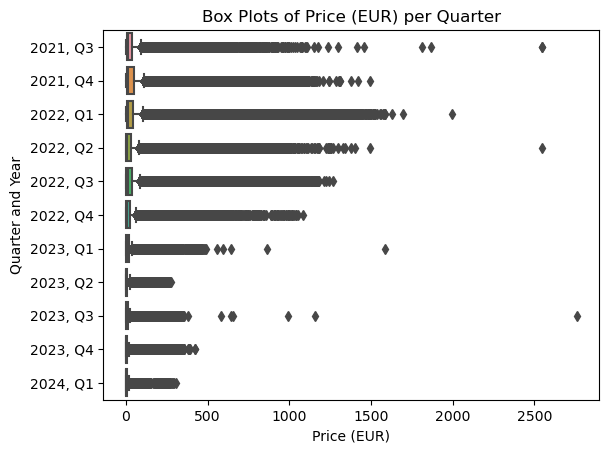

In [28]:

# Create a new column combining the 'transaction_date_year' and 'transaction_date_quarter' columns
monetary_transactions_df.loc[:, 'Quarter_Year'] = monetary_transactions_df['transaction_date_year'].astype(str) + ', Q' + monetary_transactions_df['transaction_date_quarter'].astype(str)

# Create a horizontal box plot with 'price_eur' on the x-axis and 'Quarter_Year' on the y-axis
sns.boxplot(x='price_eur', y='Quarter_Year', data=monetary_transactions_df)
plt.xlabel('Price (EUR)')
plt.ylabel('Quarter and Year')
plt.title('Box Plots of Price (EUR) per Quarter')
plt.show()

In [29]:
transactions_df['transaction_category'].value_counts()

transaction_category
monetary_transaction    928208
trade                   193761
free_transaction        121018
other                     3080
Name: count, dtype: int64

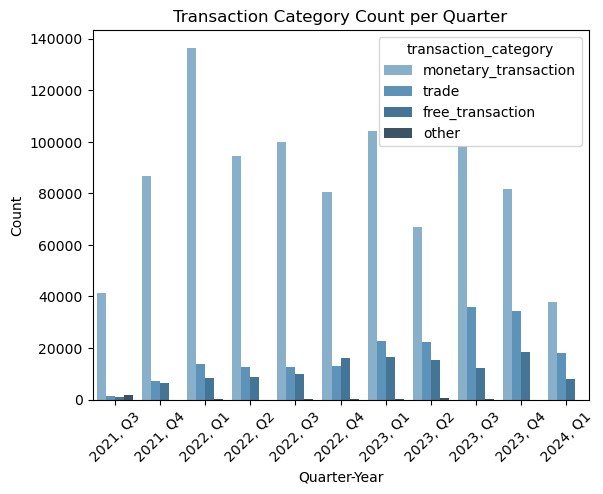

In [30]:


# Create the count plot with 'Month_Year' on the x-axis and 'transaction_category' indicated by hue
sns.set_palette("Blues_d",4)  # Optional: set a color palette
sns.countplot(x='Quarter_Year', data=transactions_df, hue='transaction_category')
plt.xlabel('Quarter-Year')
plt.ylabel('Count')
plt.title('Transaction Category Count per Quarter')
plt.xticks(rotation=45)
plt.show()

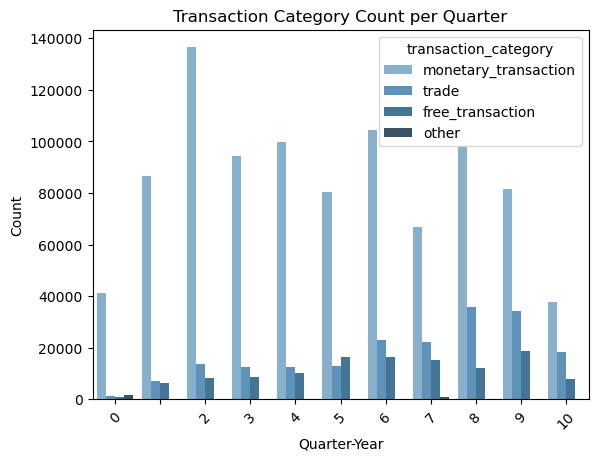

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot with 'Quarter_Year' on the x-axis and 'transaction_category' indicated by hue
sns.set_palette("Blues_d", 4)  # Optional: set a color palette
ax = sns.countplot(x='Quarter_Year', data=transactions_df, hue='transaction_category')

# Remove the specific tick label 'Q1 24'
xtick_labels = ax.get_xticks().tolist()  # Get the current tick labels
xtick_labels[1] = ''  # Remove the tick label at index 1 (Q1 24)
ax.set_xticklabels(xtick_labels)  # Set the modified tick labels

plt.xlabel('Quarter-Year')
plt.ylabel('Count')
plt.title('Transaction Category Count per Quarter')
plt.xticks(rotation=45)
plt.show()

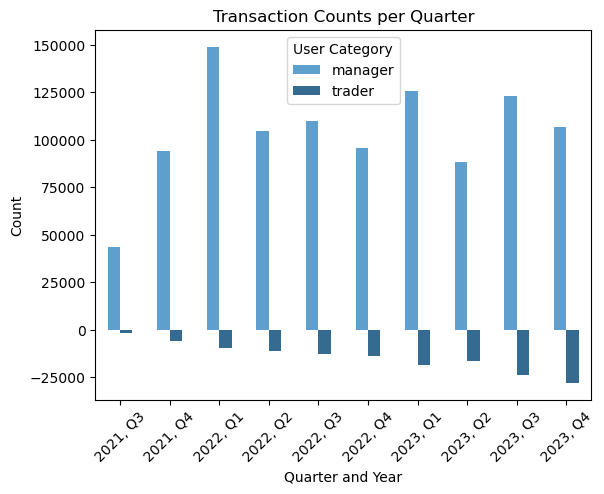

In [19]:

import datetime

# Group the transactions by 'Quarter_Year' and 'user_category' and calculate the count
counts = transactions_df.groupby(['Quarter_Year', 'user_category']).size().reset_index(name='Count')

# Filter out the current quarter based on the current date
current_date = datetime.datetime.now()
current_year = current_date.year
current_quarter = (current_date.month - 1) // 3 + 1
current_quarter_year = f"{current_year}, Q{current_quarter}"
counts = counts[counts['Quarter_Year'] != current_quarter_year]

# Pivot the data to have 'user_category' as columns and 'Count' as values
counts_pivot = counts.pivot(index='Quarter_Year', columns='user_category', values='Count')

# Multiply the trader counts by -1 to make them negative
counts_pivot['trader'] *= -1

# Plot the count of manager and trader transactions as grouped bar plots
sns.set_palette("Blues_d", 2)  # Optional: set a color palette
counts_pivot.plot(kind='bar', stacked=False)
plt.xlabel('Quarter and Year')
plt.ylabel('Count')
plt.title('Transaction Counts per Quarter')
plt.xticks(rotation=45)
plt.legend(title='User Category')
plt.show()

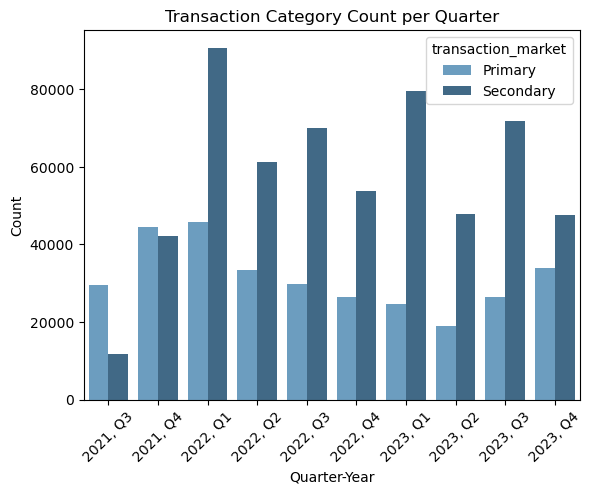

In [20]:

import seaborn as sns
import matplotlib.pyplot as plt

# Filter out the current quarter based on the current_quarter_year
filtered_df = monetary_transactions_df[monetary_transactions_df['Quarter_Year'] != current_quarter_year]

sns.set_palette("Blues_d", 2)

# Plot the count of transaction categories per quarter using countplot
sns.countplot(x='Quarter_Year', data=filtered_df, hue='transaction_market')
plt.xlabel('Quarter-Year')
plt.ylabel('Count')
plt.title('Transaction Category Count per Quarter')
plt.xticks(rotation=45)
plt.show()

NameError: name 'mtick' is not defined

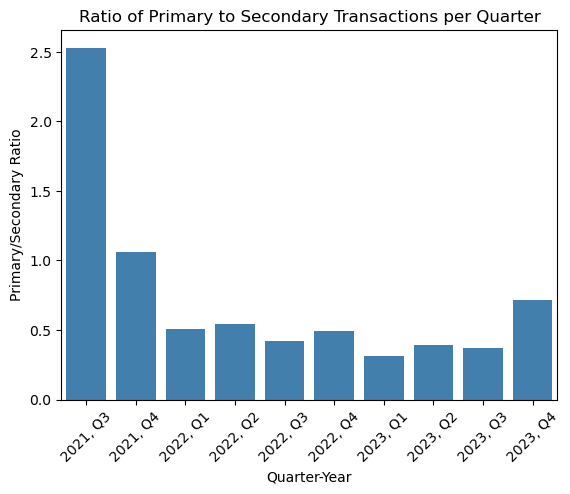

In [21]:


# Filter out the current quarter based on the current_quarter_year
filtered_df = monetary_transactions_df[monetary_transactions_df['Quarter_Year'] != current_quarter_year]

# Group the filtered transactions by 'Quarter_Year' and calculate the count for each transaction type
counts = filtered_df.groupby(['Quarter_Year', 'transaction_market']).size().unstack()

# Calculate the ratio of primary to secondary transactions for each quarter
counts['Ratio'] = counts['Primary'] / counts['Secondary']

# Define the colors for the palette
palette_colors = ["#3182BD"]

# Plot the ratio of primary to secondary transactions per quarter using barplot
ax = sns.barplot(x=counts.index, y='Ratio', data=counts, palette=palette_colors)
plt.xlabel('Quarter-Year')
plt.ylabel('Primary/Secondary Ratio')
plt.title('Ratio of Primary to Secondary Transactions per Quarter')
plt.xticks(rotation=45)

# Set the y-axis as a percentage with % symbol
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Annotate each bar with its corresponding percentage value
for p in ax.patches:
    percentage = str(round(p.get_height() * 100, 2)) + '%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

In [22]:
transactions_df['transaction_date_season'].value_counts()

transaction_date_season
season_2022    484051
season_2021    450691
season_2023    311325
Name: count, dtype: int64

/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


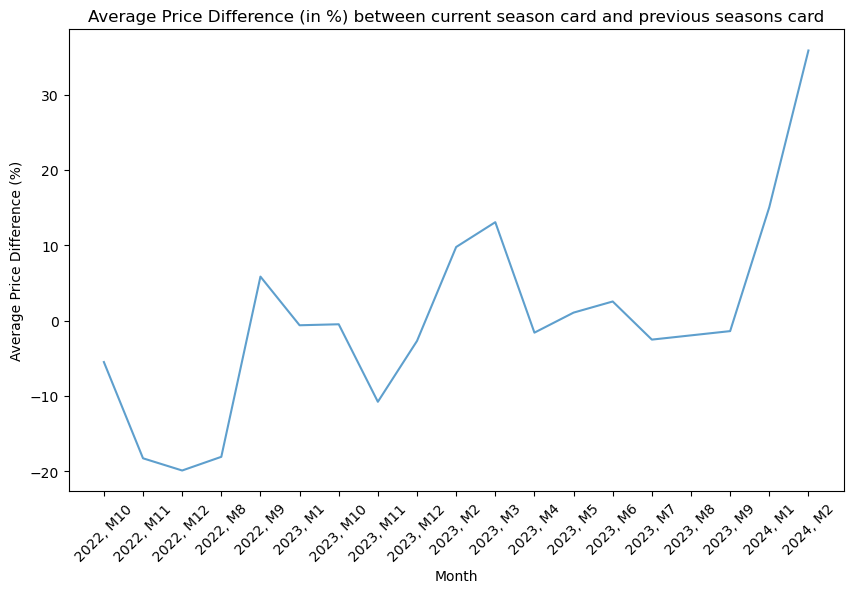

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe to include only True and False values for "in_season_card_transaction"
filtered_df = monetary_transactions_df[monetary_transactions_df['in_season_card_transaction'].isin([True, False])]

# Filter the dataframe to include only specific seasons
filtered_df = filtered_df[filtered_df['transaction_date_season'].isin(["season_2022", "season_2023"])]

# Group the filtered data by month and calculate the average price for True and False groups
avg_prices = filtered_df.groupby(['Month_Year', 'in_season_card_transaction'])['price_eur'].mean().unstack()

# Calculate the percentage difference between True and False groups
avg_prices['Price Difference (%)'] = (avg_prices[True] - avg_prices[False]) / avg_prices[False] * 100

# Plot the average price difference by month
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_prices['Price Difference (%)'])
plt.xlabel('Month')
plt.ylabel('Average Price Difference (%)')
plt.title('Average Price Difference (in %) between current season card and previous seasons card')
plt.xticks(rotation=45)
plt.show()

/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ValueError: invalid literal for int() with base 10: '2022, M10'

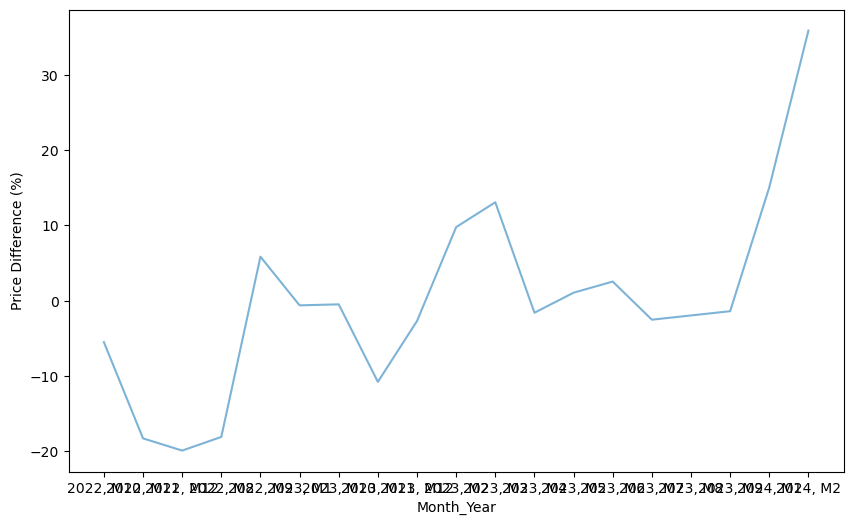

In [34]:
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe to include only True and False values for "in_season_card_transaction"
filtered_df = monetary_transactions_df[monetary_transactions_df['in_season_card_transaction'].isin([True, False])]

# Filter the dataframe to include only specific seasons
filtered_df = filtered_df[filtered_df['transaction_date_season'].isin(["season_2022", "season_2023"])]

# Group the filtered data by month and calculate the average price for True and False groups
avg_prices = filtered_df.groupby(['Month_Year', 'in_season_card_transaction'])['price_eur'].mean().unstack()

# Calculate the percentage difference between True and False groups
avg_prices['Price Difference (%)'] = (avg_prices[True] - avg_prices[False]) / avg_prices[False] * 100

# Plot the average price difference by month
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=avg_prices['Price Difference (%)'])

# Combine month names with year
xtick_labels = [f"{calendar.month_name[int(month.split('-')[0])]} {month.split('-')[1]}" for month in avg_prices.index]

# Update the tick labels with combined month and year
ax.set_xticklabels(xtick_labels)

plt.xlabel('Month-Year')
plt.ylabel('Average Price Difference (%)')
plt.title('Average Price Difference (in %) between current season card and previous seasons card')
plt.xticks(rotation=45)
plt.show()

## Analysis with player perfomance and Utility

In [24]:
players_scores_df = pd.read_csv('cleaned_la_liga_players_scores.csv')

In [ ]:
players_score

In [25]:
players_scores_df.isna().sum()

player_name            0
player_slug            0
player_id              0
age                    0
u23_eligible           0
u23_until          93946
so5_score              0
decisive_score         0
gameweek_date          0
gameweek_number        0
gameweek_id            0
status_proxy           0
L5                     0
L15                    0
Start15                0
regular_status         0
dtype: int64

In [26]:
# Convert 'gameweek_date' column to datetime data type
players_scores_df.loc[:, 'gameweek_date'] = pd.to_datetime(players_scores_df['gameweek_date'])

/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ValueError: The number of FixedLocator locations (19), usually from a call to set_ticks, does not match the number of labels (12).

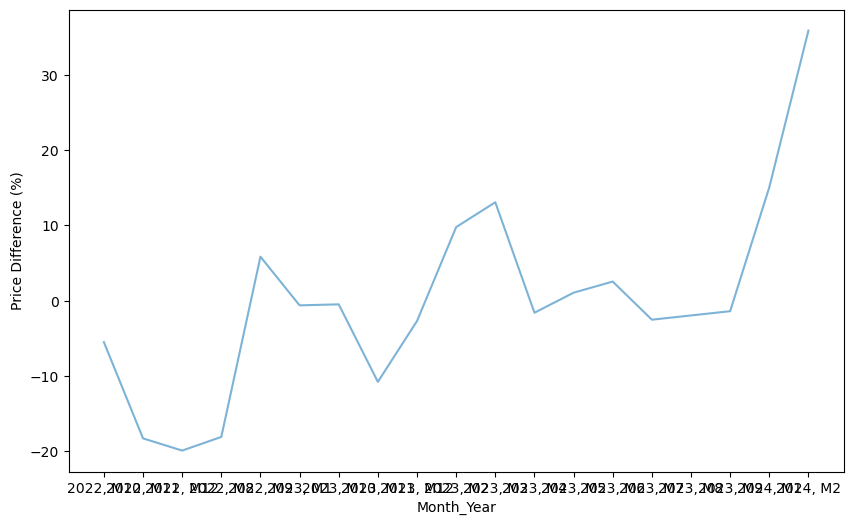

In [35]:
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe to include only True and False values for "in_season_card_transaction"
filtered_df = monetary_transactions_df[monetary_transactions_df['in_season_card_transaction'].isin([True, False])]

# Filter the dataframe to include only specific seasons
filtered_df = filtered_df[filtered_df['transaction_date_season'].isin(["season_2022", "season_2023"])]

# Group the filtered data by month and calculate the average price for True and False groups
avg_prices = filtered_df.groupby(['Month_Year', 'in_season_card_transaction'])['price_eur'].mean().unstack()

# Calculate the percentage difference between True and False groups
avg_prices['Price Difference (%)'] = (avg_prices[True] - avg_prices[False]) / avg_prices[False] * 100

# Plot the average price difference by month
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=avg_prices['Price Difference (%)'])

# Update the x-axis ticks and labels
months = range(1, 13)  # Numeric labels for months
years = avg_prices.index.str[-4:]  # Extract the years from the index

# Set the x-axis ticks and labels
ax.set_xticks(range(len(avg_prices)))
ax.set_xticklabels([f"{calendar.month_name[int(month)]} {year}" for month, year in zip(months, years)], rotation=45)

plt.xlabel('Month-Year')
plt.ylabel('Average Price Difference (%)')
plt.title('Average Price Difference (in %) between current season card and previous seasons card')
plt.show()

